### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import r2_score


### Reading Data

In [2]:
df = pd.read_csv("Big Mart Sale Data.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

null values are in 2 columns Item_Weight and Outlet_Size

### Correlation

In [8]:
df[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]].corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [9]:
df.corr()[["Item_Outlet_Sales"]]

C:\Users\laksh\AppData\Local\Temp\ipykernel_18872\749465473.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[["Item_Outlet_Sales"]]


,Item_Outlet_Sales
Item_Weight,0.014123
Item_Visibility,-0.128625
Item_MRP,0.567574
Outlet_Establishment_Year,-0.049135
Item_Outlet_Sales,1.000000


C:\Users\laksh\AppData\Local\Temp\ipykernel_18872\221754715.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr())


<Axes: >

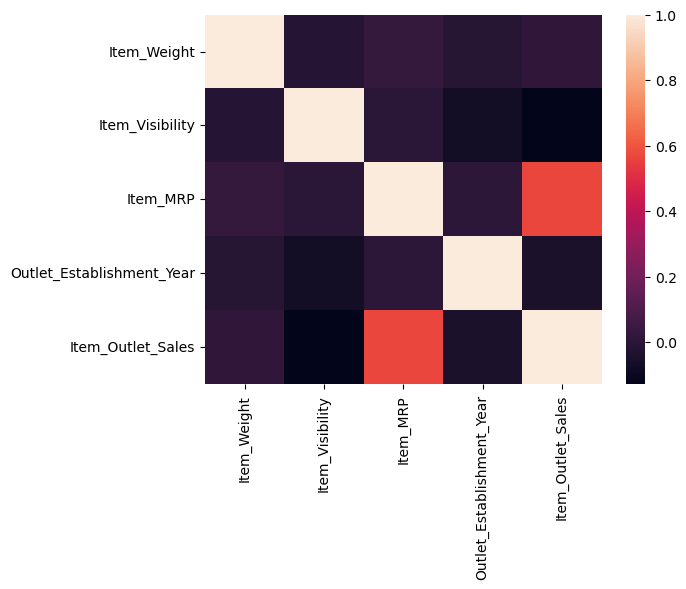

In [10]:
sn.heatmap(df.corr())

There is correlation between item_mrp and item_outlet_sales

### Exploratory Data Analysis

<Axes: xlabel='Item_Identifier', ylabel='count'>

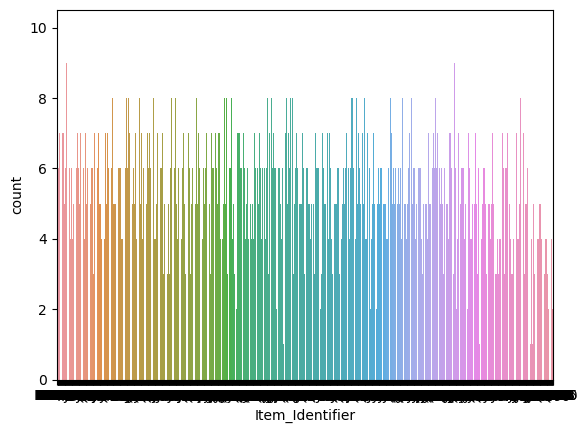

In [11]:
sn.countplot(x = df["Item_Identifier"], data = df)

```
Item identifier is the name of product it does not effect sales so we are removing it.
```

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

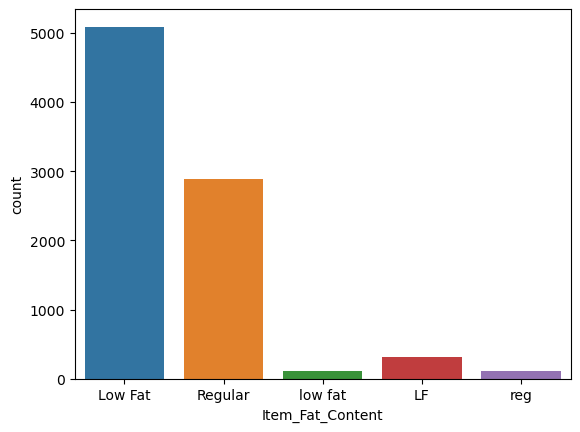

In [12]:
sn.countplot(x = df["Item_Fat_Content"], data = df)

In [13]:

df["Item_Fat_Content"] = np.where((df["Item_Fat_Content"] == "low fat") | (df["Item_Fat_Content"] == "LF"), 
                                    "Low Fat",
                                    np.where(df["Item_Fat_Content"] == "reg", 
                                            "Regular", 
                                            df["Item_Fat_Content"]))

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

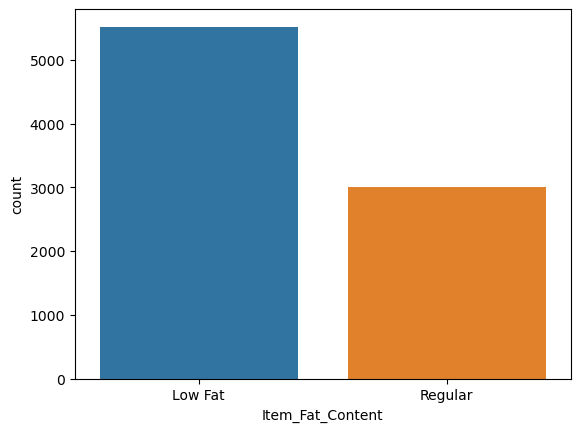

In [14]:
sn.countplot(x = df["Item_Fat_Content"], data = df)

<Axes: xlabel='Item_Type', ylabel='count'>

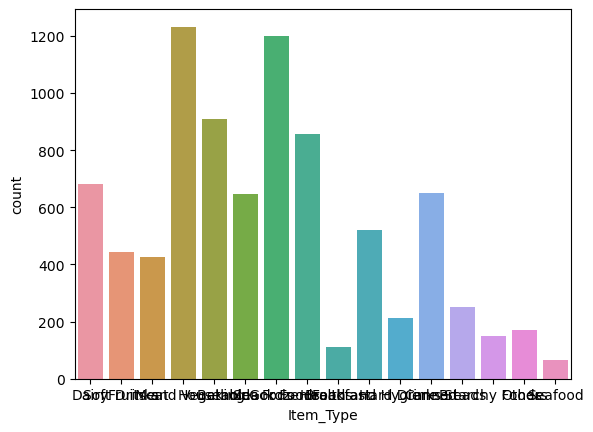

In [15]:
sn.countplot(x = df["Item_Type"], data = df)

In [16]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<Axes: xlabel='Outlet_Identifier', ylabel='count'>

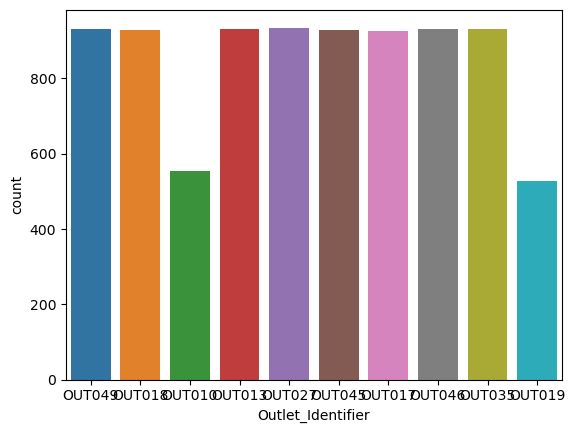

In [17]:
sn.countplot(x = df["Outlet_Identifier"], data = df)

In [18]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

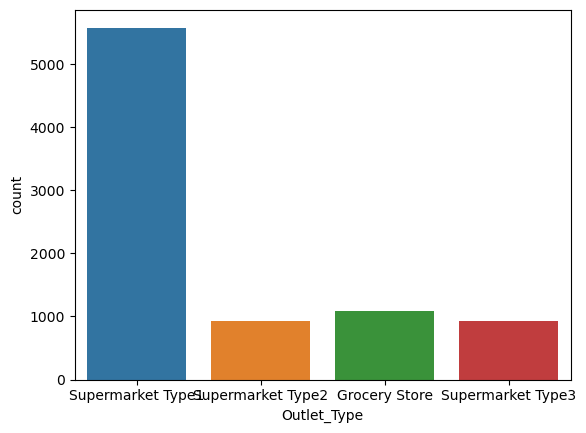

In [19]:
sn.countplot(x = df["Outlet_Type"], data = df)
df["Outlet_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

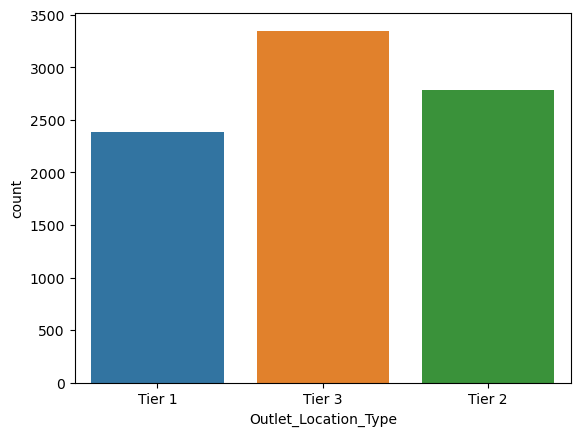

In [20]:
sn.countplot(x = df["Outlet_Location_Type"], data = df)
df["Outlet_Location_Type"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

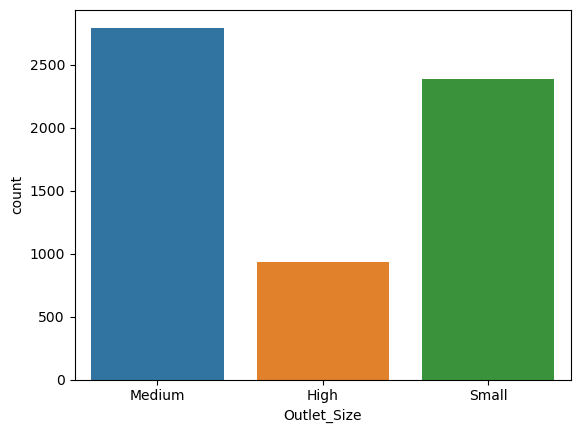

In [21]:
sn.countplot(x = df["Outlet_Size"], data = df)
df["Outlet_Size"].value_counts()

<Axes: xlabel='Item_Weight', ylabel='Count'>

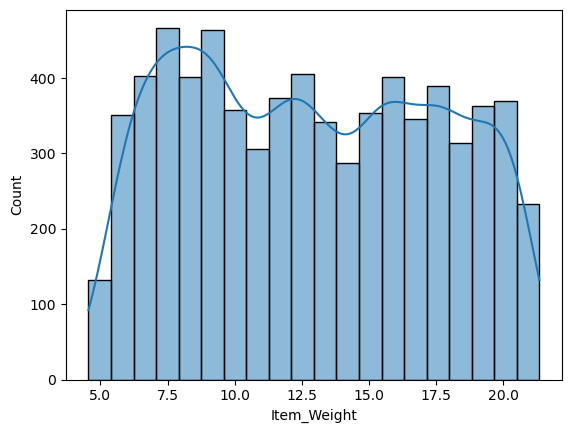

In [22]:
# num_cols = ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]
sn.histplot(df["Item_Weight"], kde = True)

<Axes: >

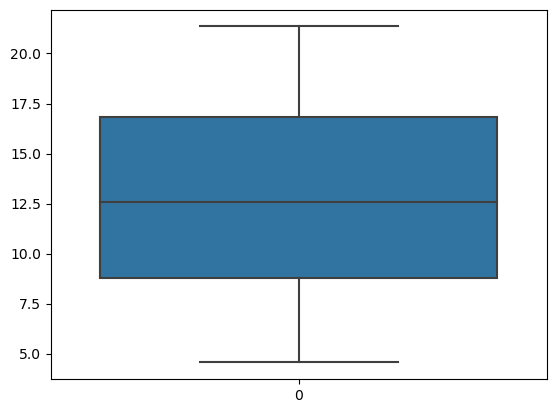

In [23]:
sn.boxplot(df["Item_Weight"])

<Axes: xlabel='Item_Visibility', ylabel='Count'>

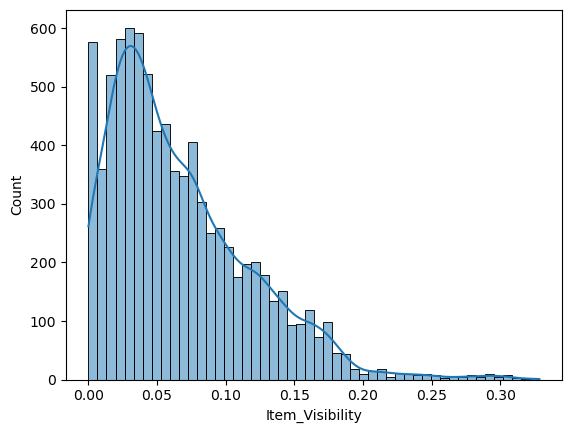

In [24]:
sn.histplot(df["Item_Visibility"], kde=True)

<Axes: >

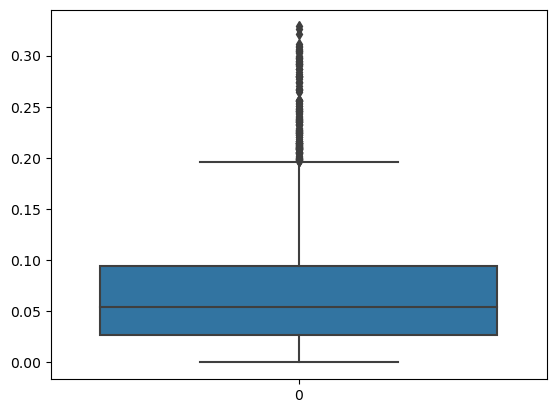

In [25]:
sn.boxplot(df["Item_Visibility"])

<Axes: xlabel='Item_MRP', ylabel='Count'>

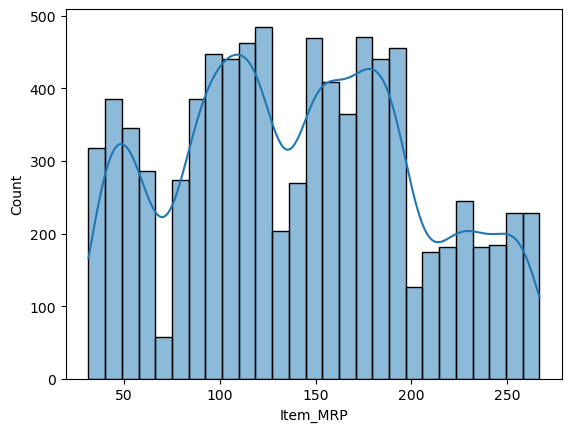

In [26]:
sn.histplot(df["Item_MRP"], kde = True)

<Axes: >

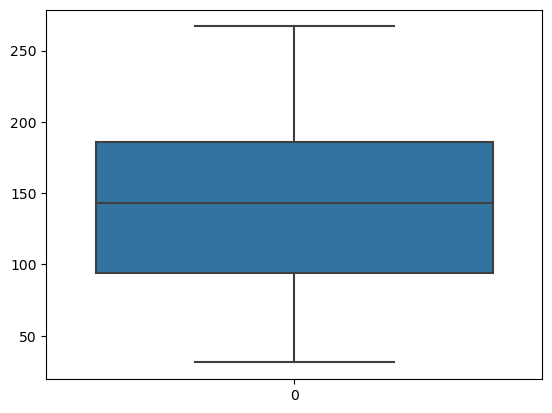

In [27]:
sn.boxplot(df["Item_MRP"])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

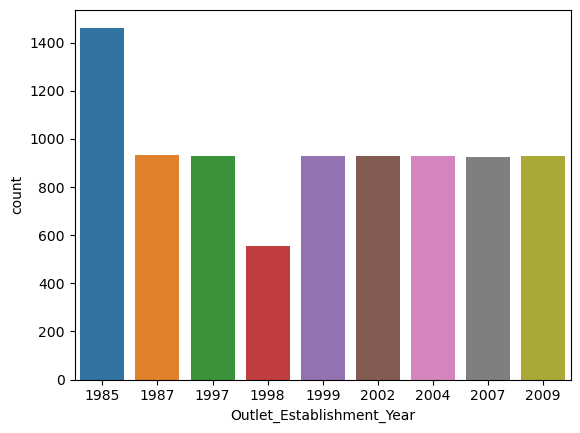

In [28]:
sn.countplot(x = df["Outlet_Establishment_Year"], data=df)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

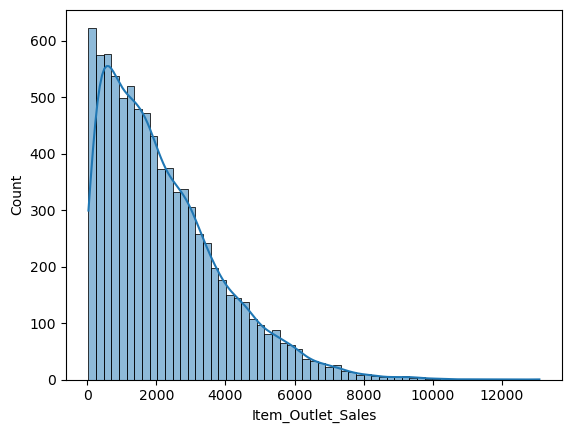

In [29]:
sn.histplot(df["Item_Outlet_Sales"], kde = True)

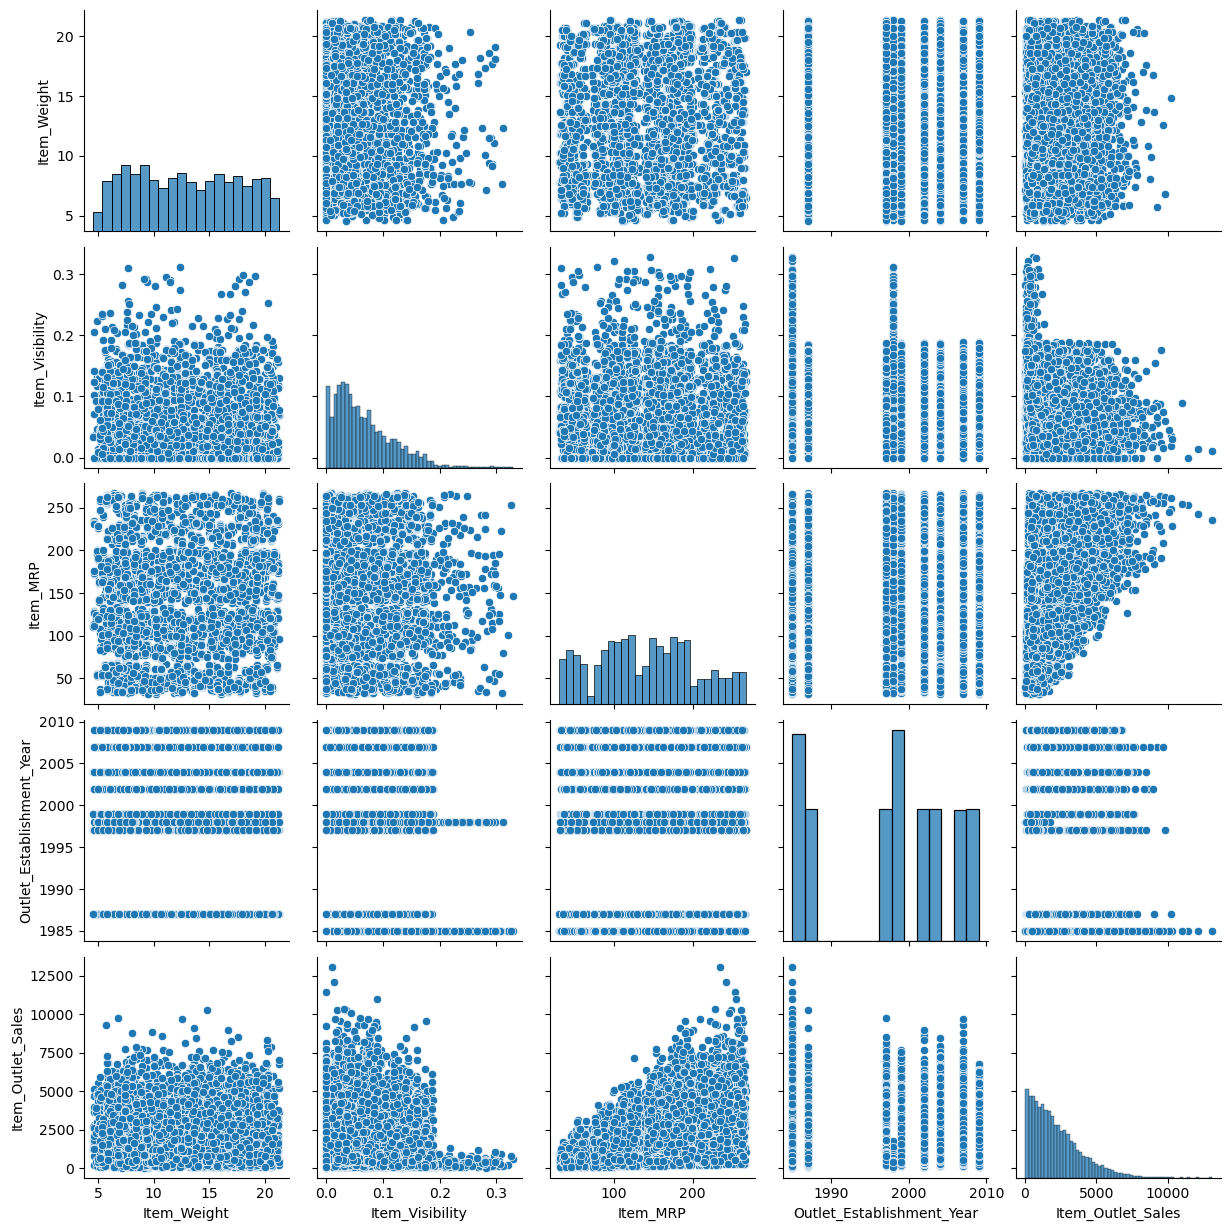

In [30]:
sn.pairplot(df)

#### EDA Results:
```
1. Outliers are present in "Item_Visibility"
2. There are null values in 2 columns - Item_Weight and Outlet_Size
3. "Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year", "Outlet_Size"  are not related in predicting outlet_sales
```

### Feature Engineering

##### Removing not required columns

In [31]:
df.drop(columns = ["Item_Identifier", "Outlet_Identifier","Outlet_Size","Outlet_Establishment_Year"], inplace=True)

In [32]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,Tier 3,Supermarket Type1,994.7052


##### Removing Outliers

In [33]:
percentile25 = df['Item_Visibility'].quantile(0.25)
percentile75 = df['Item_Visibility'].quantile(0.75)
IQR = percentile75 - percentile25

In [34]:
upper_limit = percentile75+1.5*IQR
lower_limit = percentile25-1.5*IQR

In [35]:
upper_limit

0.195979015

In [36]:
lower_limit

-0.07440424500000001

In [37]:
df[df['Item_Visibility'] > upper_limit]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,NaN,Regular,0.255395,Dairy,196.8794,Tier 1,Grocery Store,780.3176
83,NaN,Low Fat,0.293418,Household,194.6136,Tier 1,Grocery Store,583.2408
108,NaN,Low Fat,0.278974,Soft Drinks,225.3720,Tier 1,Grocery Store,679.1160
174,17.70,Low Fat,0.291865,Fruits and Vegetables,115.1834,Tier 3,Grocery Store,345.5502
334,NaN,Low Fat,0.204700,Frozen Foods,76.8670,Tier 1,Grocery Store,229.7010
...,...,...,...,...,...,...,...,...
8292,NaN,Regular,0.209163,Fruits and Vegetables,179.1976,Tier 1,Grocery Store,543.2928
8345,NaN,Regular,0.266397,Frozen Foods,215.6218,Tier 1,Grocery Store,641.1654
8371,8.27,Regular,0.214125,Soft Drinks,183.9924,Tier 3,Grocery Store,185.0924
8432,14.00,Regular,0.227261,Frozen Foods,54.3640,Tier 3,Grocery Store,159.7920


In [38]:
df[df['Item_Visibility'] < lower_limit]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [39]:
df['Item_Visibility'] = np.where(
    df['Item_Visibility'] > upper_limit,
    upper_limit,
    np.where(
        df['Item_Visibility'] < lower_limit,
        lower_limit,
        df['Item_Visibility']
    )
)

<Axes: >

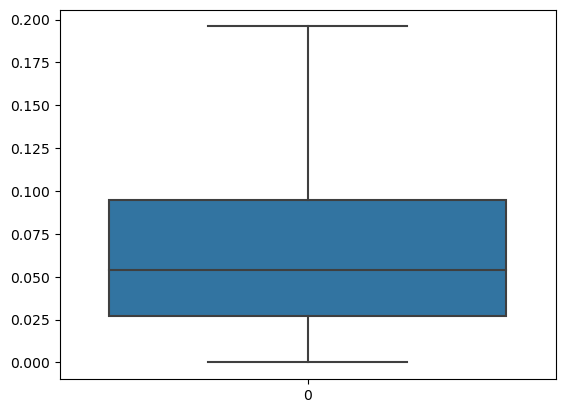

In [40]:
sn.boxplot(df["Item_Visibility"])

In [41]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,Tier 3,Supermarket Type1,994.7052


##### Features and Target

In [118]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

##### TrainTestSplit

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                random_state=42)
X_train.shape

(6818, 7)

##### Column Transformers

In [134]:
# imputation transformer
trf1 = ColumnTransformer(transformers = [
    ("Impute_Item_Weight", KNNImputer(weights='distance'),[0]),
],remainder = "passthrough")

In [135]:
# one hot encoding
trf2 = ColumnTransformer(transformers = [
    ("oe_Item_Fat_Content", OrdinalEncoder(categories=[["Low Fat","Regular"]]),[1]),
    ("oe_Outlet_Location_Type", OrdinalEncoder(categories=[["Tier 3","Tier 2", "Tier 1"]]),[5]),
    ("ohe_Item_Type_Outlet_Type", OneHotEncoder(sparse = False, handle_unknown="ignore"),[3,6])
],remainder = "passthrough")

In [136]:
# Scaling
trf3 = ColumnTransformer(transformers = [
    ("scale", MinMaxScaler(), slice(0,28))
])

In [137]:
# Feature selection
trf4 = SelectKBest(score_func=f_classif,k=8)

In [138]:
# train the model
# LinearRegression
trf5 = LinearRegression()

In [139]:
# LinearRegression using Gradient Descent
trf6 = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

In [148]:
# Ridge Regularization
trf7 = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [149]:
# Lasso Regularization
trf8 = SGDRegressor(penalty='l1',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [150]:
# Elastic Net
trf9 = ElasticNet(alpha=0.005,l1_ratio=0.9)

In [151]:
pipe1 = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])


In [152]:
# Display Pipeline
set_config(display='diagram')

In [153]:
pipe1.fit(X_train,y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute_Item_Weight',
                                                  KNNImputer(weights='distance'),
                                                  [0])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe_Item_Fat_Content',
                                                  OrdinalEncoder(categories=[['Low '
                                                                              'Fat',
                                                                              'Regular']]),
                                                  [1]),
                                                 ('oe_Outlet_Location_Type',
                                                  OrdinalEncoder(categories=[['Tier '
                                                                              '3',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '1']]),
                                                  [5]),
                                                 ('ohe_Item_Type_Outlet_Type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [3, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 28, None))])),
                ('trf4', SelectKBest(k=8)), ('trf5', LinearRegression())])

In [165]:
# Predict
y_pred = pipe1.predict(X_test)
y_pred

array([1359.49110884,  784.37139445,  802.10068451, ...,  802.10068451,
        573.19615566, 1826.13218423])

In [167]:
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.578685514673759

In [156]:
pipe2 = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf6',trf6)
])
set_config(display='diagram')
pipe2.fit(X_train,y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute_Item_Weight',
                                                  KNNImputer(weights='distance'),
                                                  [0])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe_Item_Fat_Content',
                                                  OrdinalEncoder(categories=[['Low '
                                                                              'Fat',
                                                                              'Regular']]),
                                                  [1]),
                                                 ('oe_Outlet_Location_Type',
                                                  OrdinalEncoder(categories=[['Tier '
                                                                              '3',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '1']]),
                                                  [5]),
                                                 ('ohe_Item_Type_Outlet_Type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [3, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 28, None))])),
                ('trf4', SelectKBest(k=8)),
                ('trf6', SGDRegressor(learning_rate='constant', max_iter=100))])

In [168]:
y_pred = pipe2.predict(X_test)
r2 = r2_score(y_test,y_pred)
r2

0.5772414233461374

In [158]:
pipe3 = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf7',trf7)
])
set_config(display='diagram')
pipe3.fit(X_train,y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute_Item_Weight',
                                                  KNNImputer(weights='distance'),
                                                  [0])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe_Item_Fat_Content',
                                                  OrdinalEncoder(categories=[['Low '
                                                                              'Fat',
                                                                              'Regular']]),
                                                  [1]),
                                                 ('oe_Outlet_Location_Type',
                                                  OrdinalEncoder(categories=[['Tier '
                                                                              '3',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '1']]),
                                                  [5]),
                                                 ('ohe_Item_Type_Outlet_Type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [3, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 28, None))])),
                ('trf4', SelectKBest(k=8)),
                ('trf7',
                 SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant',
                              max_iter=500))])

In [169]:
y_pred = pipe3.predict(X_test)
r3 = r2_score(y_test,y_pred)
r3

0.5471929300158014

In [160]:
pipe4 = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf8',trf8)
])
set_config(display='diagram')
pipe4.fit(X_train,y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute_Item_Weight',
                                                  KNNImputer(weights='distance'),
                                                  [0])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe_Item_Fat_Content',
                                                  OrdinalEncoder(categories=[['Low '
                                                                              'Fat',
                                                                              'Regular']]),
                                                  [1]),
                                                 ('oe_Outlet_Location_Type',
                                                  OrdinalEncoder(categories=[['Tier '
                                                                              '3',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '1']]),
                                                  [5]),
                                                 ('ohe_Item_Type_Outlet_Type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [3, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 28, None))])),
                ('trf4', SelectKBest(k=8)),
                ('trf8',
                 SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant',
                              max_iter=500, penalty='l1'))])

In [170]:
y_pred = pipe4.predict(X_test)
r4 = r2_score(y_test,y_pred)
r4

0.5007663845759794

In [163]:
pipe5 = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf9',trf9)
])
set_config(display='diagram')
pipe5.fit(X_train,y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute_Item_Weight',
                                                  KNNImputer(weights='distance'),
                                                  [0])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe_Item_Fat_Content',
                                                  OrdinalEncoder(categories=[['Low '
                                                                              'Fat',
                                                                              'Regular']]),
                                                  [1]),
                                                 ('oe_Outlet_Location_Type',
                                                  OrdinalEncoder(categories=[['Tier '
                                                                              '3',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '1']]),
                                                  [5]),
                                                 ('ohe_Item_Type_Outlet_Type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [3, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 28, None))])),
                ('trf4', SelectKBest(k=8)),
                ('trf9', ElasticNet(alpha=0.005, l1_ratio=0.9))])

In [171]:
y_pred = pipe5.predict(X_test)
r5 = r2_score(y_test,y_pred)
r5

0.5788567141391058

In [175]:
print("Linear Regression : r2 score = ", round(r1,2))
print("SGD Regression : r2 score = ", round(r2,2))
print("Ridge Regression : r2 score = ", round(r3,2))
print("Lasso Regression : r2 score = ", round(r4,2))
print("Elastic Net Regression : r2 score = ", round(r5,2))

Linear Regression : r2 score =  0.58
SGD Regression : r2 score =  0.58
Ridge Regression : r2 score =  0.55
Lasso Regression : r2 score =  0.5
Elastic Net Regression : r2 score =  0.58


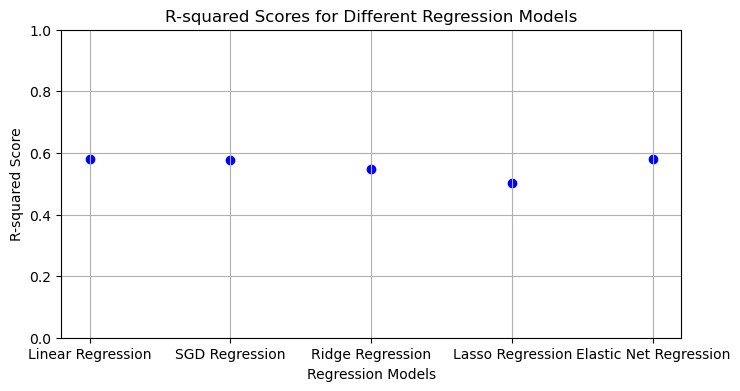

In [183]:
models = ['Linear Regression', 'SGD Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression']
r2_scores = [r1, r2, r3, r4, r5]

plt.figure(figsize=(8, 4))
plt.scatter(models, r2_scores, color='blue')
plt.title('R-squared Scores for Different Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('R-squared Score')
plt.ylim(0, 1)  # Assuming R-squared scores are between 0 and 1
plt.grid(True)
plt.show()